In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the Excel sheet
UV180 = pd.read_excel('DATOS T1 Y T9_V3-2.xlsx', sheet_name='UV180', parse_dates=['H'])
UV250 = pd.read_excel('DATOS T1 Y T9_V3-2.xlsx', sheet_name='UV250', parse_dates=['H'])
UV395 = pd.read_excel('DATOS T1 Y T9_V3-2.xlsx', sheet_name='UV395', parse_dates=['H'])


df = pd.concat([UV180, UV250, UV395], ignore_index=True)

# Display the dataframe
print(df.head())

  Temperatura    Hr      UV  DIA          H  Muestra     T1     T9
0        15°C  0.79  180 nm    1 2023-08-17        1  280.8  274.6
1        15°C  0.79  180 nm    1 2023-08-17        2  243.2  280.4
2        15°C  0.79  180 nm    1 2023-08-17        3  242.6  265.0
3        15°C  0.79  180 nm    1 2023-08-17        4  251.6  274.1
4        15°C  0.79  180 nm    1 2023-08-17        5  247.6  249.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperatura  1215 non-null   object        
 1   Hr           1215 non-null   object        
 2   UV           1215 non-null   object        
 3   DIA          1215 non-null   int64         
 4   H            1215 non-null   datetime64[ns]
 5   Muestra      1215 non-null   int64         
 6   T1           1215 non-null   float64       
 7   T9           1215 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 76.1+ KB


In [5]:
df['H']= df['H'].dt.time

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperatura  1215 non-null   object 
 1   Hr           1215 non-null   object 
 2   UV           1215 non-null   object 
 3   DIA          1215 non-null   int64  
 4   H            1215 non-null   object 
 5   Muestra      1215 non-null   int64  
 6   T1           1215 non-null   float64
 7   T9           1215 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 76.1+ KB


In [7]:
df['H'].unique()

array([datetime.time(0, 0), datetime.time(5, 0), datetime.time(10, 0),
       datetime.time(15, 0), datetime.time(20, 0), datetime.time(1, 0),
       datetime.time(6, 0), datetime.time(11, 0), datetime.time(16, 0),
       datetime.time(21, 0), datetime.time(2, 0), datetime.time(7, 0),
       datetime.time(12, 0), datetime.time(17, 0), datetime.time(22, 0)],
      dtype=object)

In [8]:
# Combine 'day' and 'hour' into a single datetime column
df['Time'] = df['DIA'].astype(str) + ' ' + pd.to_datetime(df['H'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
df['Time'] = pd.to_datetime(df['Time'], format='%d %H:%M:%S')


df.head()


,Temperatura,Hr,UV,DIA,H,Muestra,T1,T9,Time
0,15°C,0.79,180 nm,1,00:00:00,1,280.8,274.6,1900-01-01
1,15°C,0.79,180 nm,1,00:00:00,2,243.2,280.4,1900-01-01
2,15°C,0.79,180 nm,1,00:00:00,3,242.6,265.0,1900-01-01
3,15°C,0.79,180 nm,1,00:00:00,4,251.6,274.1,1900-01-01
4,15°C,0.79,180 nm,1,00:00:00,5,247.6,249.2,1900-01-01


In [9]:
df['Time'].unique()

array(['1900-01-01T00:00:00.000000000', '1900-01-01T05:00:00.000000000',
       '1900-01-01T10:00:00.000000000', '1900-01-01T15:00:00.000000000',
       '1900-01-01T20:00:00.000000000', '1900-01-02T01:00:00.000000000',
       '1900-01-02T06:00:00.000000000', '1900-01-02T11:00:00.000000000',
       '1900-01-02T16:00:00.000000000', '1900-01-02T21:00:00.000000000',
       '1900-01-03T02:00:00.000000000', '1900-01-03T07:00:00.000000000',
       '1900-01-03T12:00:00.000000000', '1900-01-03T17:00:00.000000000',
       '1900-01-03T22:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperatura  1215 non-null   object        
 1   Hr           1215 non-null   object        
 2   UV           1215 non-null   object        
 3   DIA          1215 non-null   int64         
 4   H            1215 non-null   object        
 5   Muestra      1215 non-null   int64         
 6   T1           1215 non-null   float64       
 7   T9           1215 non-null   float64       
 8   Time         1215 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 85.6+ KB


In [11]:
len(df['Time'].unique())

15

In [12]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars="UV", value_vars=["T1", "T9"], var_name="Clase", value_name="Value")

Text(0.5, 1.0, 'Combined Boxplot')

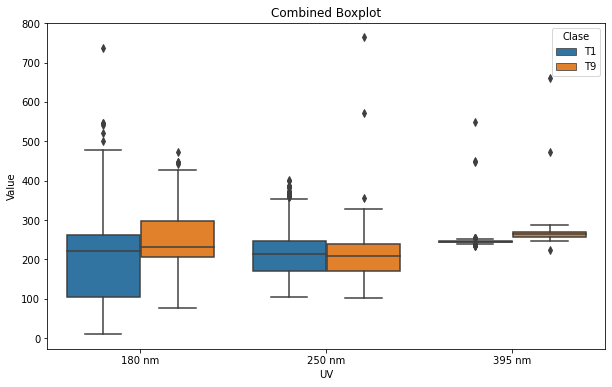

In [13]:
# Create a combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x="UV", y="Value", hue="Clase")
plt.title("Combined Boxplot")

<AxesSubplot:xlabel='T1', ylabel='Count'>

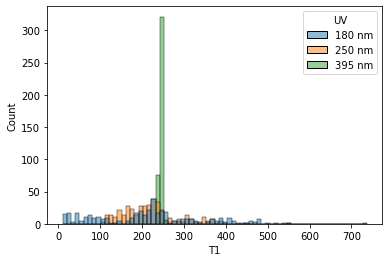

In [14]:
sns.histplot(data=df, x="T1", hue="UV")

<AxesSubplot:xlabel='T9', ylabel='Count'>

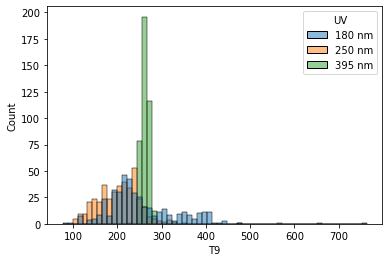

In [15]:
sns.histplot(data=df, x="T9", hue="UV")

sns.relplot(
    data=df[df['UV']=='180 nm'], x="Time", y="T1",
    col="Muestra",
    kind="scatter"
)

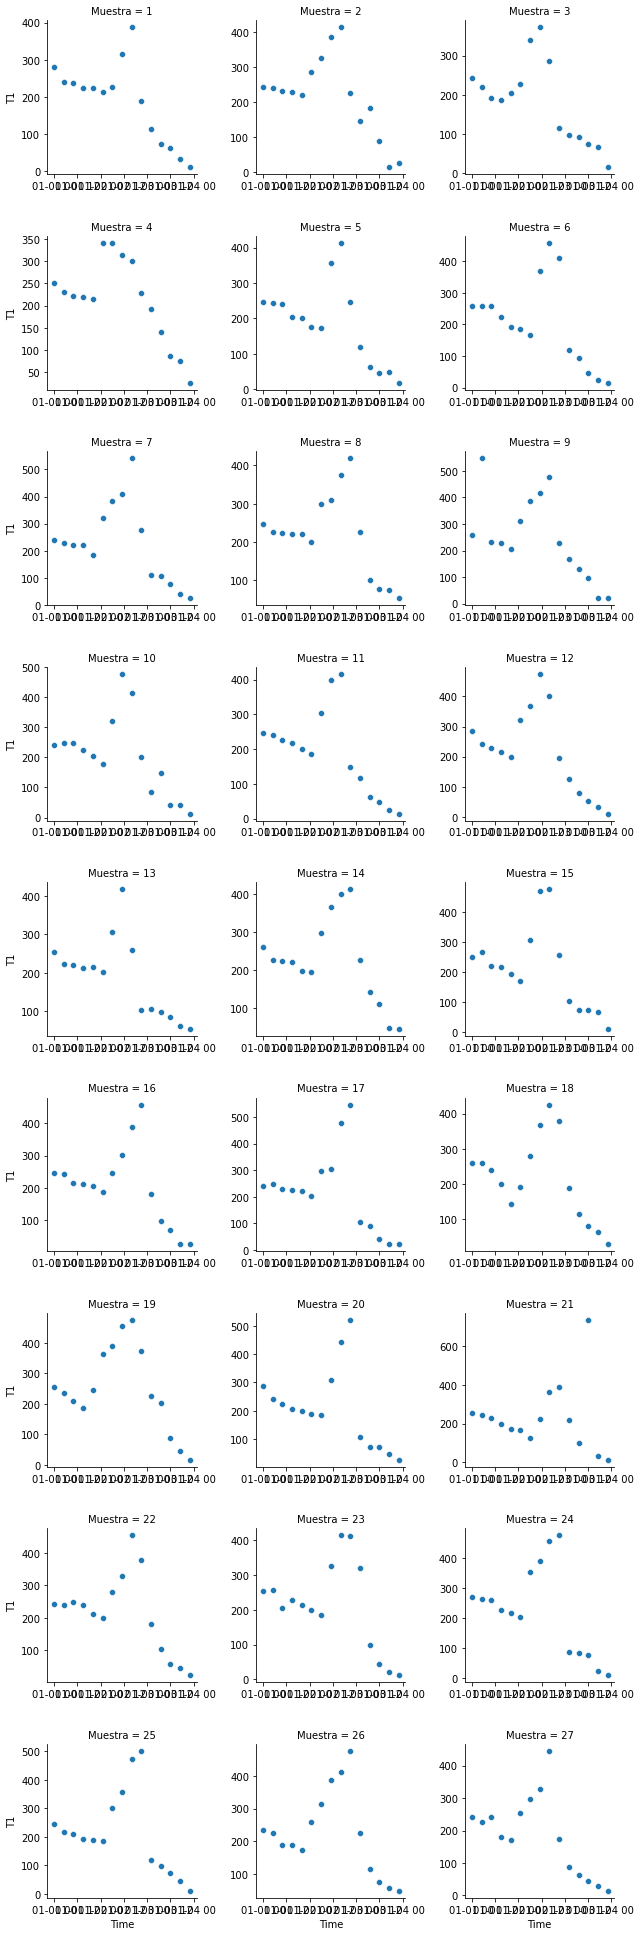

In [16]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='180 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()


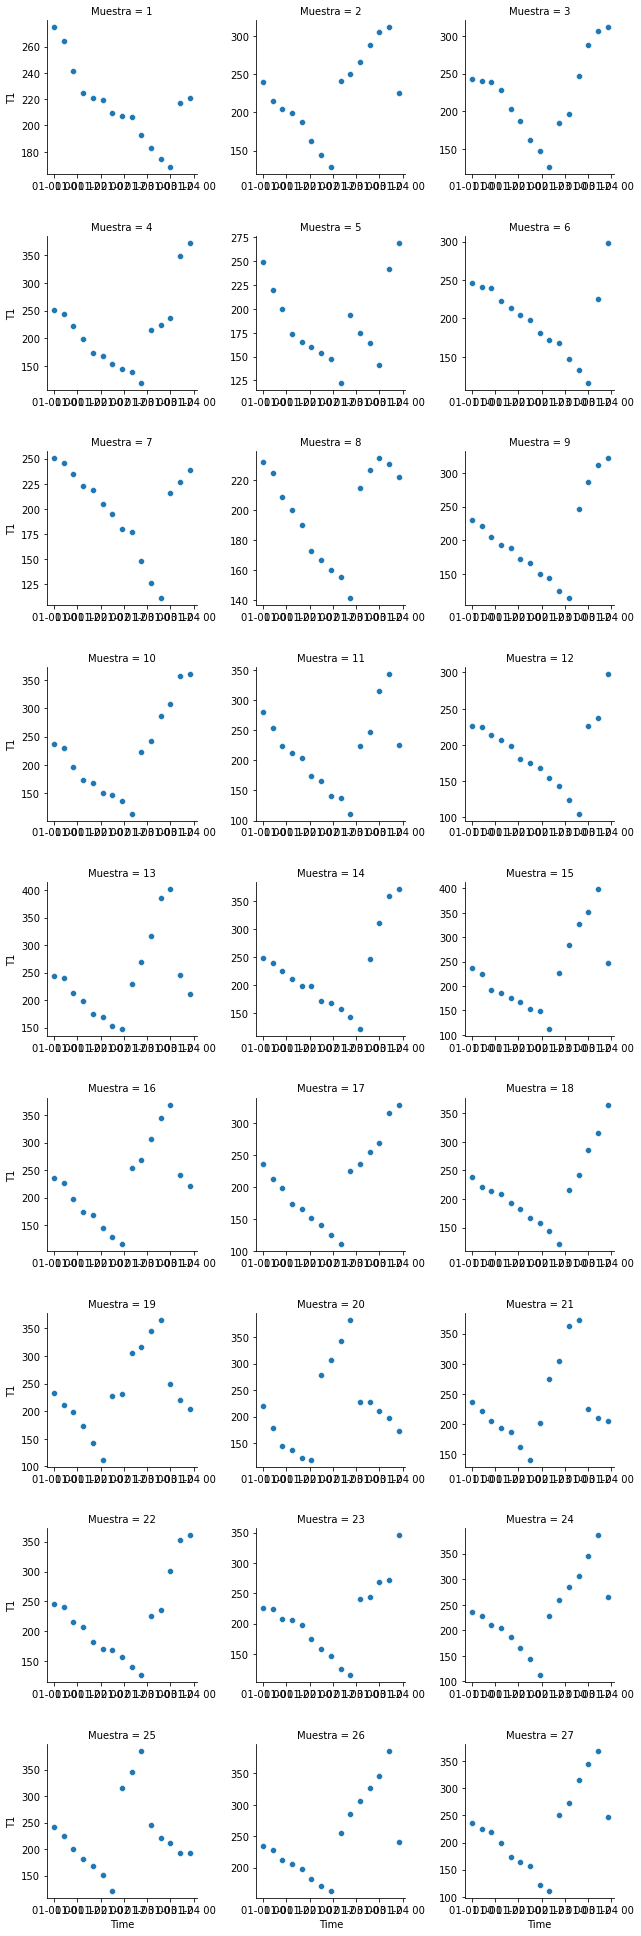

In [17]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='250 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()

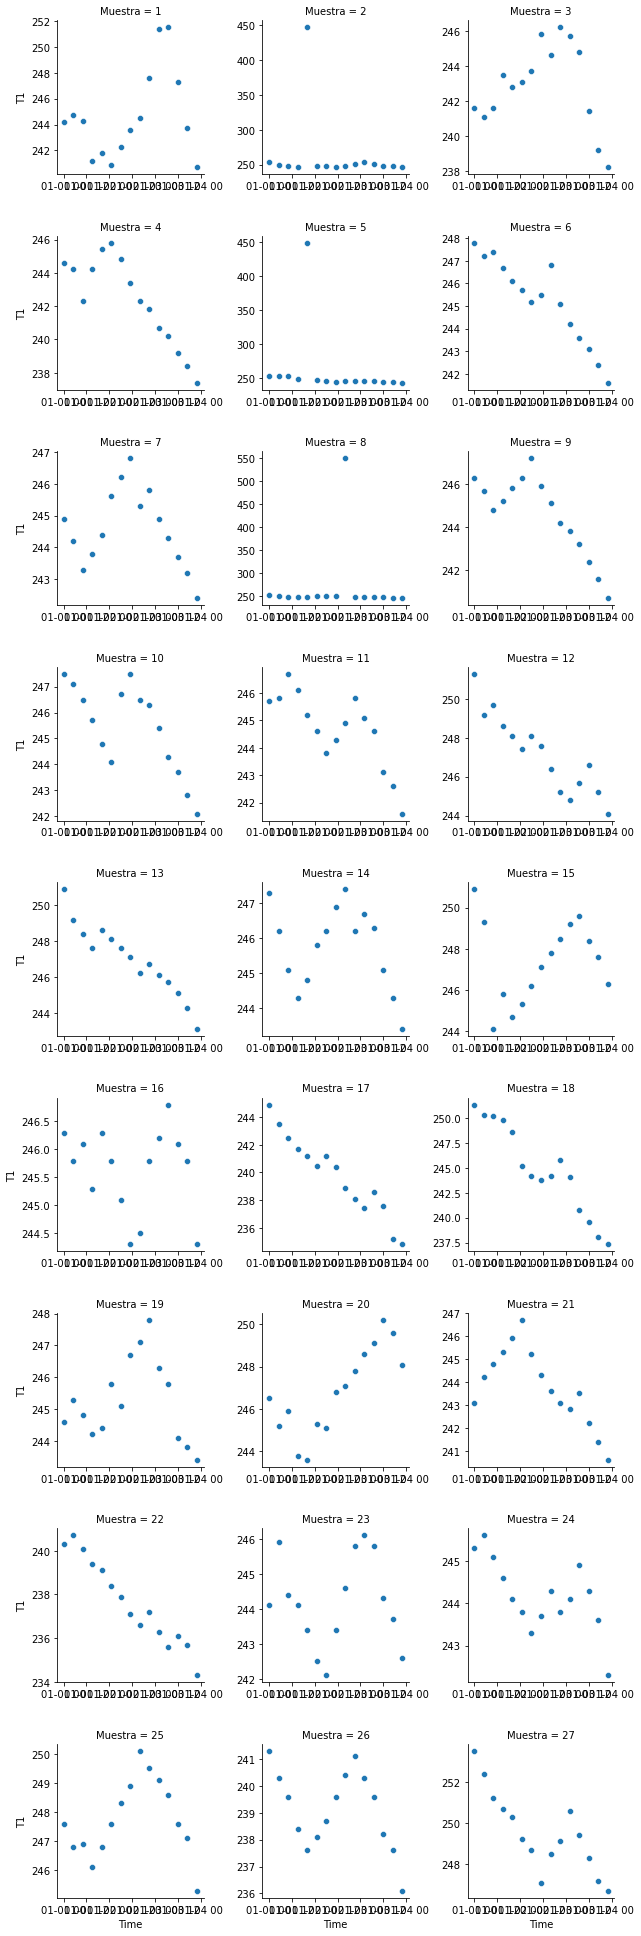

In [18]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='395 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()

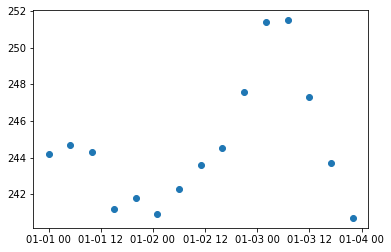

In [42]:
filtered= df[(df['UV']=='395 nm')&(df['Muestra']==1)]

plt.plot(filtered["Time"], filtered["T1"], 'o')